# Optional LAB | Matplotlib Homework - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to a real-world situation and dataset:

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego. Pymaceuticals specializes in anti-cancer pharmaceuticals. In its most recent efforts, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the executive team to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.

## Instructions

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st

In [2]:
# import mouse data
df_mouse = pd.read_csv('data_mouse_metadata.csv')
df_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# import study results data
df_results = pd.read_csv('data_study_results.csv')
df_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


### Merge the data sets

In [4]:
# merge the data sets
merged_df = pd.merge(df_mouse, df_results, on="Mouse ID",how="left")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Standardize header names

In [5]:
merged_df.columns.to_list()

['Mouse ID',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites']

In [6]:
def standardize_col(col):
    return col.lower().replace(" ","_")

In [7]:
standardize_col("Drug Regimen")

'drug_regimen'

In [8]:
new_cols=[]
for col in merged_df.columns:
    new_cols.append(standardize_col(col))
new_cols

['mouse_id',
 'drug_regimen',
 'sex',
 'age_months',
 'weight_(g)',
 'timepoint',
 'tumor_volume_(mm3)',
 'metastatic_sites']

In [9]:
merged_df.columns=new_cols
merged_df

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mouse_id            1893 non-null   object 
 1   drug_regimen        1893 non-null   object 
 2   sex                 1893 non-null   object 
 3   age_months          1893 non-null   int64  
 4   weight_(g)          1893 non-null   int64  
 5   timepoint           1893 non-null   int64  
 6   tumor_volume_(mm3)  1893 non-null   float64
 7   metastatic_sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [11]:
# check if there are duplicates timepoint - mouse_id
# create a new boolean column 'dup' : false = duplicated 
merged_df['dup'] = ~merged_df.duplicated() & merged_df.drop_duplicates().duplicated(subset='timepoint' and 'mouse_id',keep=False).fillna(True)
merged_df

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites,dup
0,k403,Ramicane,Male,21,16,0,45.000000,0,True
1,k403,Ramicane,Male,21,16,5,38.825898,0,True
2,k403,Ramicane,Male,21,16,10,35.014271,1,True
3,k403,Ramicane,Male,21,16,15,34.223992,1,True
4,k403,Ramicane,Male,21,16,20,32.997729,1,True
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,True
1889,z969,Naftisol,Male,9,30,30,65.841013,3,True
1890,z969,Naftisol,Male,9,30,35,69.176246,4,True
1891,z969,Naftisol,Male,9,30,40,70.314904,4,True


In [12]:
# count how many duplicates are in the table. 
# false dup results =  duplicated rows  (12)
merged_df.value_counts('dup')

dup
True     1880
False      13
dtype: int64

In [13]:
#drop duplicates and reset index
merged_df.drop(merged_df[merged_df['dup'] == False].index, inplace=True)
merged_df

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites,dup
0,k403,Ramicane,Male,21,16,0,45.000000,0,True
1,k403,Ramicane,Male,21,16,5,38.825898,0,True
2,k403,Ramicane,Male,21,16,10,35.014271,1,True
3,k403,Ramicane,Male,21,16,15,34.223992,1,True
4,k403,Ramicane,Male,21,16,20,32.997729,1,True
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,True
1889,z969,Naftisol,Male,9,30,30,65.841013,3,True
1890,z969,Naftisol,Male,9,30,35,69.176246,4,True
1891,z969,Naftisol,Male,9,30,40,70.314904,4,True


In [14]:
merged_df.value_counts('dup')

dup
True    1880
dtype: int64

In [15]:
merged_df = merged_df.drop('dup', axis=1)
merged_df

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# reset index 
merged_df.reset_index(drop=True, inplace=True)
merged_df

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


### Use the cleaned data for the remaining steps.

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mouse_id            1880 non-null   object 
 1   drug_regimen        1880 non-null   object 
 2   sex                 1880 non-null   object 
 3   age_months          1880 non-null   int64  
 4   weight_(g)          1880 non-null   int64  
 5   timepoint           1880 non-null   int64  
 6   tumor_volume_(mm3)  1880 non-null   float64
 7   metastatic_sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


## Statistics
### Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [18]:
# long way but not authomatical
# calculate mean, median, variance, standard_dev, sem
mean = merged_df.groupby('drug_regimen').mean()['tumor_volume_(mm3)']
median = merged_df.groupby('drug_regimen').median()['tumor_volume_(mm3)']
variance = merged_df.groupby('drug_regimen').var()['tumor_volume_(mm3)']
standard_deviation = merged_df.groupby('drug_regimen').std()['tumor_volume_(mm3)']
sem = merged_df.groupby('drug_regimen').sem()['tumor_volume_(mm3)']

In [19]:
# create a table with the calculations from before 
statistics_table = pd.DataFrame(mean)
statistics_table = statistics_table.rename(columns={"tumor_volume_(mm3)": "mean"})
statistics_table["median"] = median
statistics_table["variance"] = variance
statistics_table["std"] = standard_deviation
statistics_table["sem"] = sem

statistics_table

,mean,median,variance,std,sem
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.765682,51.910178,38.835601,6.231822,0.472433
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.345698,53.739593,68.149888,8.255295,0.605308
Naftisol,54.432995,52.544915,65.934669,8.120017,0.598616
Placebo,54.083767,52.316010,61.051374,7.813538,0.582387
Propriva,52.414660,50.965298,42.199890,6.496144,0.515178
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.284444,52.488221,59.303779,7.700895,0.573991


In [20]:
# short way --> with agg.
statistics = merged_df.groupby('drug_regimen')
statistics = statistics.agg(['mean','median','var','std','sem'])["tumor_volume_(mm3)"]
statistics 

,mean,median,var,std,sem
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.765682,51.910178,38.835601,6.231822,0.472433
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.345698,53.739593,68.149888,8.255295,0.605308
Naftisol,54.432995,52.544915,65.934669,8.120017,0.598616
Placebo,54.083767,52.316010,61.051374,7.813538,0.582387
Propriva,52.414660,50.965298,42.199890,6.496144,0.515178
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.284444,52.488221,59.303779,7.700895,0.573991


### Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the number of total mice for each treatment regimen throughout the course of the study.
NOTE: These plots should look identical.

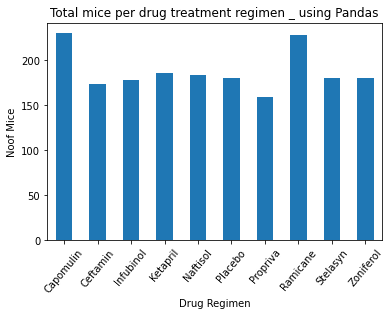

In [21]:
# creating de bar plot using pandas
barplot = merged_df.groupby('drug_regimen').count()['tumor_volume_(mm3)']
mdbarplot = pd.DataFrame(barplot)
also = mdbarplot.plot.bar(legend=False,rot=50)
also
plt.ylabel("Noof Mice")
plt.xlabel("Drug Regimen")
plt.title("Total mice per drug treatment regimen _ using Pandas")
plt.savefig('pandasbarplot')

In [22]:
mdbarplot

,tumor_volume_(mm3)
drug_regimen,
Capomulin,230
Ceftamin,174
Infubinol,178
Ketapril,186
Naftisol,184
Placebo,180
Propriva,159
Ramicane,228
Stelasyn,180


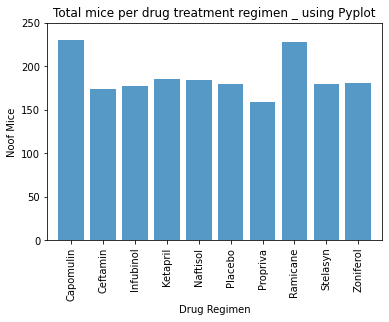

In [23]:
# creating a bar plot using pyplot
x_axis = np.arange(len(barplot))
tick_locations = [x for x in x_axis]
resetindex = mdbarplot.reset_index()
resetindex

plt.bar(x_axis, mdbarplot['tumor_volume_(mm3)'], alpha=0.75, align="center")
plt.xticks(tick_locations, resetindex['drug_regimen'],rotation="vertical")

plt.xlim(-0.75, len(barplot)-.25)
plt.ylim(0, 250)

plt.ylabel("Noof Mice")
plt.xlabel("Drug Regimen")
plt.title("Total mice per drug treatment regimen _ using Pyplot")
plt.savefig('pyplotbarplot')

### Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.
NOTE: These plots should look identical.

In [24]:
gender = merged_df['sex'].value_counts()
gender

Male      953
Female    927
Name: sex, dtype: int64

Text(108.68, 0.5, 'sex')

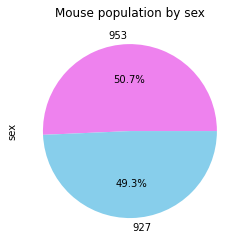

In [25]:
# creating a pie plot using pandas
plt.pie(gender, labels=gender, 
        autopct='%1.1f%%', 
        colors = ["violet", "skyblue"])
plt.title("Mouse population by sex")
plt.savefig('pandasgender')
plt.ylabel("sex")


Text(108.68, 0.5, 'sex')

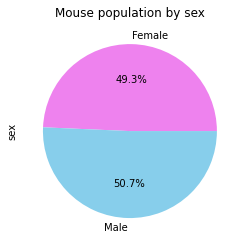

In [26]:
# creating a pie plot using pyplot
merged_df.groupby('sex').size().plot(kind='pie',
                                     autopct="%1.1f%%", #this shows percentages
                                     colors=['violet', 'skyblue'])
plt.title("Mouse population by sex")
plt.savefig('pyplotgender')
plt.ylabel("sex")

### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [27]:
cap_m = merged_df.loc[merged_df["drug_regimen"] == "Capomulin",:]
ram_m = merged_df.loc[merged_df["drug_regimen"] == "Ramicane", :]
inf_m = merged_df.loc[merged_df["drug_regimen"] == "Infubinol", :]
ceft_m = merged_df.loc[merged_df["drug_regimen"] == "Ceftamin", :]
cap_m.head()

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


#### Capomulin

In [28]:
cap_last = cap_m.groupby('mouse_id').max()['timepoint']
cap_last_2 = pd.DataFrame(cap_last)
cap_last_merged = pd.merge(cap_last_2, merged_df, on=("mouse_id","timepoint"),how="left")
cap_last_merged.head()

,mouse_id,timepoint,drug_regimen,sex,age_months,weight_(g),tumor_volume_(mm3),metastatic_sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [29]:
# capomulin outliers - quartiles
cap_last_tumors = cap_last_merged["tumor_volume_(mm3)"]

cap_quartiles = cap_last_tumors.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lower = cap_lowerq - (1.5*cap_iqr)
cap_upper = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers could be below {round(cap_lower,2)} and above {round(cap_upper,2)} ")

Capomulin potential outliers could be below 20.7 and above 51.83 


#### Ramicane

In [30]:
ram_last = ram_m.groupby('mouse_id').max()['timepoint']
ram_last_2 = pd.DataFrame(ram_last)
ram_last_merged = pd.merge(ram_last_2, merged_df, on=("mouse_id","timepoint"),how="left")
ram_last_merged.head()

,mouse_id,timepoint,drug_regimen,sex,age_months,weight_(g),tumor_volume_(mm3),metastatic_sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [31]:
# ramicane outliers - quartiles
ram_last_tumors = ram_last_merged["tumor_volume_(mm3)"]

ram_quartiles = ram_last_tumors.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lower = ram_lowerq - (1.5*ram_iqr)
ram_upper = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers could be below {round(ram_lower,2)} and above {round(ram_upper,2)} ")

Ramicane potential outliers could be below 17.91 and above 54.31 


#### Infubinol

In [32]:
inf_last = inf_m.groupby('mouse_id').max()['timepoint']
inf_last_2 = pd.DataFrame(inf_last)
inf_last_merged = pd.merge(inf_last_2, merged_df, on=("mouse_id","timepoint"),how="left")
inf_last_merged.head()

,mouse_id,timepoint,drug_regimen,sex,age_months,weight_(g),tumor_volume_(mm3),metastatic_sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [33]:
# ramicane outliers - quartiles
inf_last_tumors = inf_last_merged["tumor_volume_(mm3)"]

inf_quartiles = inf_last_tumors.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lower = inf_lowerq - (1.5*inf_iqr)
inf_upper = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers could be below {round(inf_lower,2)} and above {round(inf_upper,2)} ")

Infubinol potential outliers could be below 36.83 and above 82.74 


#### Ceftamin

In [34]:
ceft_last = ceft_m.groupby('mouse_id').max()['timepoint']
ceft_last_2 = pd.DataFrame(ceft_last)
ceft_last_merged = pd.merge(ceft_last_2, merged_df, on=("mouse_id","timepoint"),how="left")
ceft_last_merged.head()

,mouse_id,timepoint,drug_regimen,sex,age_months,weight_(g),tumor_volume_(mm3),metastatic_sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b487,25,Ceftamin,Female,6,28,56.057749,1
2,b759,30,Ceftamin,Female,12,25,55.742829,1
3,f436,15,Ceftamin,Female,3,25,48.722078,2
4,h531,5,Ceftamin,Male,5,27,47.784682,0


In [35]:
# ceftamin outliers - quartiles
ceft_last_tumors = ceft_last_merged["tumor_volume_(mm3)"]

ceft_quartiles = ceft_last_tumors.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq

ceft_lower = ceft_lowerq - (1.5*ram_iqr)
ceft_upper = ceft_upperq + (1.5*ram_iqr)
print(f"Ceftamin potential outliers could be below {round(ceft_lower,2)} and above {round(ceft_upper,2)} ")

Ceftamin potential outliers could be below 42.41 and above 78.28 


### Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
Hint: All four box plots should be within the same figure. Use this Matplotlib documentation page for help with changing the style of the outliers.

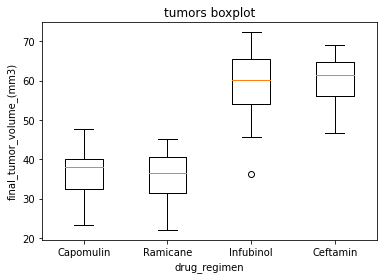

In [36]:
# whiskerplot = boxplot
whiskerplot = [cap_last_tumors, ram_last_tumors, inf_last_tumors, ceft_last_tumors]

fig1, ax1 = plt.subplots()
ax1.set_title('tumors boxplot')
ax1.set_ylabel('final_tumor_volume_(mm3)')
ax1.set_xlabel('drug_regimen')

ax1.boxplot(whiskerplot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('whiskerplot')
plt.show()

### Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

In [37]:
cap_mice = merged_df['drug_regimen'].str.contains('Capomulin', case=False, na=False)
merged_df[cap_mice]

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1444,r157,Capomulin,Male,22,25,0,45.000000,0
1445,r157,Capomulin,Male,22,25,5,45.597064,0
1446,r157,Capomulin,Male,22,25,10,46.059608,0


In [38]:
s185 = merged_df.loc[merged_df["mouse_id"] == "s185",:]
s185.head()

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


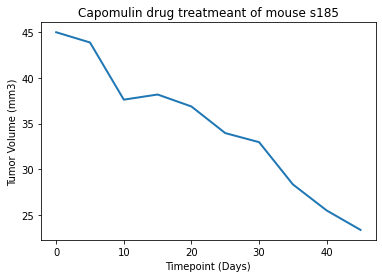

In [39]:
x_axisTP = s185["timepoint"]
tumorvol = s185["tumor_volume_(mm3)"]

plt.title('Capomulin drug treatmeant of mouse s185')
plt.plot(x_axisTP, tumorvol,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('linechart')


### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

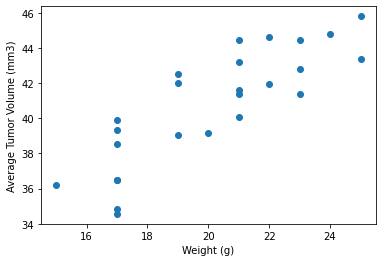

In [40]:
cap_avg = merged_df[cap_mice].groupby(['mouse_id']).mean()
plt.scatter(cap_avg['weight_(g)'],cap_avg['tumor_volume_(mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterplot')

### Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

In [41]:
corr=round(st.pearsonr(cap_avg['weight_(g)'],cap_avg['tumor_volume_(mm3)'])[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume is {corr}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


In [42]:
model=st.linregress(cap_avg['weight_(g)'],cap_avg['tumor_volume_(mm3)'])
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

SLOPE: 
- tells you how much you can expect Y to change as X increases.
- the units for slope are the units of the Y variable per units of the X variable
- It's a ratio of change in Y per change in X.
- [definition extracted from](https://www.dummies.com/education/math/statistics/how-to-interpret-a-regression-line/)

INTERCEPT: 
- The constant
- The expected mean value of Y when all X=0.
- If X sometimes equals 0, the intercept is the expected mean value of Y at that value. If X never equals 0, then the intercept has no intrinsic meaning.
- [definition extracted from](https://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/)

In [43]:
slope = 0.9544396890241045
intercept = 21.552160532685015

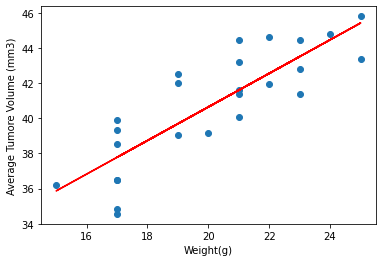

In [44]:
y_values = cap_avg['weight_(g)']*slope+intercept

plt.scatter(cap_avg['weight_(g)'],cap_avg['tumor_volume_(mm3)'])
plt.plot(cap_avg['weight_(g)'],y_values,color="red")

plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregressionmodel')
plt.show()

### Final observations

- The correlation coefficient between mouse weight and average tumor volume is 0.84. This is a good result. 
- Capomulin and Ramicane are the most successsul treatments against tumors within the mice.